In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
sns.set(style='white', context='notebook', palette='deep')


Using TensorFlow backend.


In [2]:
import pathlib
data_dir = 'C:/Users/Alou/Desktop/test/dataset/training_set'
data_dir = pathlib.Path(data_dir)

test_dir = 'C:/Users/Alou/Desktop/test/dataset/test_set'
test_dir = pathlib.Path(test_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

image_count1 = len(list(test_dir.glob('*/*.jpg')))
image_count1



2000

In [3]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

CLASS_NAMES1 = np.array([item.name for item in test_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES1

array(['cats', 'dogs'], dtype='<U4')

In [4]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [5]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 8000 images belonging to 2 classes.


In [6]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

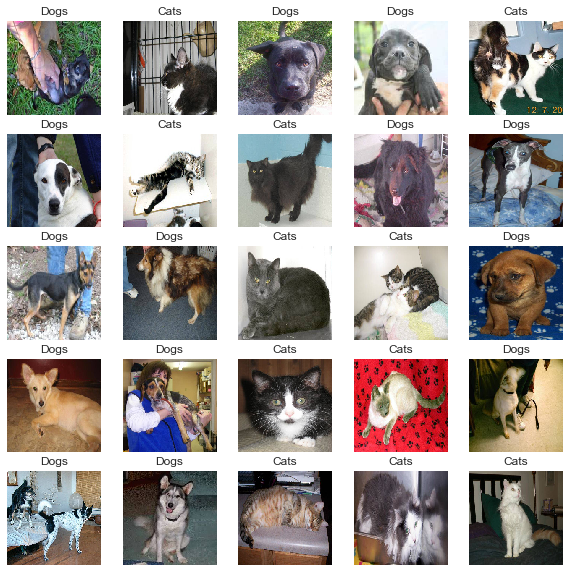

In [7]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [ ]:
import time
default_timeit_steps = 1000

def timeit(ds, steps=default_timeit_steps):
  start = time.time()
  it = iter(ds)
  for i in range(steps):
    batch = next(it)
    if i%10 == 0:
      print('.',end='')
  print()
  end = time.time()

  duration = end-start
  print("{} batches: {} s".format(steps, duration))
  print("{:0.5f} Images/s".format(BATCH_SIZE*steps/duration))

In [ ]:
# `keras.preprocessing`
timeit(train_data_gen)

In [ ]:
model = Sequential()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(data_dir, CLASS_NAMES, epochs=10, 
                    validation_data=(test_dir, CLASS_NAMES1))

AttributeError: 'WindowsPath' object has no attribute 'shape'

In [ ]:
def largestSub(a, n):  #a an array
    a.sort()     #Sort array in increase order
    
    dp = [0 for i in range(n)]  #Storing in dp[i] size of the largest divisible subset begining with a[i]
    dp[n-1] = 1  #last element is the largest so dp[n-1] is 1
    
     
    for i in range(n - 2, -1, -1):     # Fill values for smaller elements
          
        # Find all multiples of a[i]  
        # and consider the multiple  
        # that has largest subset      
        # beginning with it.  
        mult = 0; 
        for j in range(i + 1, n): 
            if a[j] % a[i] == 0: 
                mult = max(mult, dp[j]) 
        dp[i] = 1 + mult 
          
    # Return maximum value from dp[]  
    return max(dp) 
  
# Test Code 
a = [ 10, 5, 3, 15, 20 ] 
n = len(a) 
print("Bingoooooooo!!!!! the largest divisible subset is:", largestSub(a, n)) 